In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('train_and_test2.csv')

In [5]:
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [6]:
# Ver valores nulos en cada columna
print(df.isnull().sum())


Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64


In [7]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-7-808ebb813aa0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [8]:
print(df['Embarked'].isnull().sum())

0


In [9]:
df.rename(columns={'2urvived': 'survived'}, inplace=True)

In [10]:
columns_to_drop = [f'zero.{i}' for i in range(1, 19)]
df = df.drop(columns=columns_to_drop)
df=df.drop(columns=['zero'])
df.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,survived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Dividir en variables predictoras y objetivo
X = df.drop(columns=['survived'])  # Cambia 'survived' por el nombre de la columna de objetivo
y = df['survived']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Crear y entrenar el modelo
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Obtener las probabilidades de supervivencia
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidad de que y = 1 (supervivencia)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


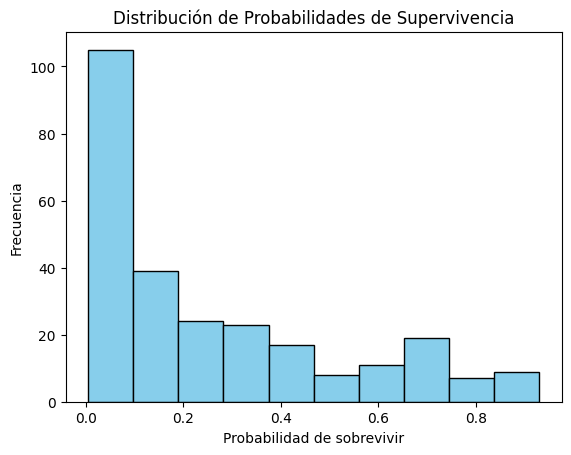

In [13]:
import matplotlib.pyplot as plt

plt.hist(y_prob, bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución de Probabilidades de Supervivencia')
plt.xlabel('Probabilidad de sobrevivir')
plt.ylabel('Frecuencia')
plt.show()

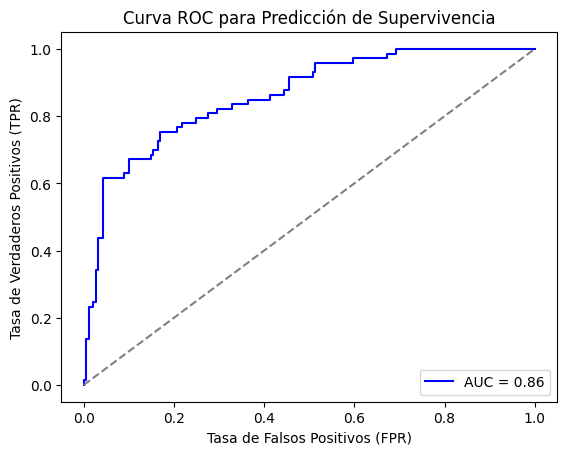

In [14]:
from sklearn.metrics import roc_curve, auc

# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Curva ROC para Predicción de Supervivencia')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.show()


In [15]:
X_test['Survival Probability'] = y_prob

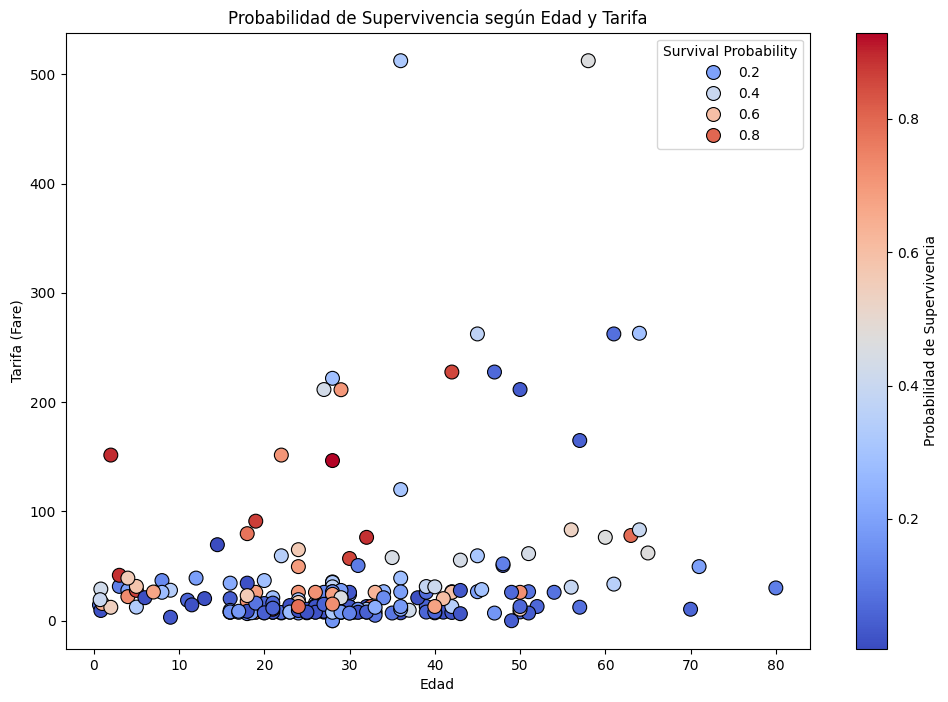

In [18]:
# Crear un gráfico de dispersión de Edad vs Tarifa, coloreado por probabilidad de supervivencia
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=X_test,
    x='Age',
    y='Fare',
    hue='Survival Probability',
    palette='coolwarm',
    edgecolor='k',
    s=100
)

# Crear el mapeo de color manualmente para la barra de color
norm = plt.Normalize(X_test['Survival Probability'].min(), X_test['Survival Probability'].max())
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
sm.set_array(np.array([]))  # Necesario para configurar el ScalarMappable

# Agregar la barra de color al eje actual
plt.colorbar(sm, ax=plt.gca(), label='Probabilidad de Supervivencia')

# Títulos y etiquetas
plt.title('Probabilidad de Supervivencia según Edad y Tarifa')
plt.xlabel('Edad')
plt.ylabel('Tarifa (Fare)')
plt.show()

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
# Eliminar la columna 'Survival Probability' de X_test si existe
if 'Survival Probability' in X_test.columns:
    X_test = X_test.drop(columns=['Survival Probability'])

# Generar predicciones para el conjunto de prueba
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidad de supervivencia (clase 1)

# Exactitud
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy:.4f}")

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de Clasificación (precisión, recall, F1-score)
class_report = classification_report(y_test, y_pred)
print("Reporte de Clasificación:")
print(class_report)

# AUC (Área Bajo la Curva)
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC del modelo: {auc_score:.4f}")


Exactitud del modelo: 0.8626
Matriz de Confusión:
[[181   8]
 [ 28  45]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       189
           1       0.85      0.62      0.71        73

    accuracy                           0.86       262
   macro avg       0.86      0.79      0.81       262
weighted avg       0.86      0.86      0.86       262

AUC del modelo: 0.8614


I will to use XGBoost to get a better ML model.

In [24]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Definir el modelo base de XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Configurar GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1',  # Cambiar a 'roc_auc' si quieres optimizar para AUC
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Ajustar el modelo
grid_search_xgb.fit(X_train, y_train)

# Ver los mejores parámetros
print("Mejores parámetros de XGBoost:", grid_search_xgb.best_params_)
print("Mejor F1-Score en validación cruzada:", grid_search_xgb.best_score_)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Mejores parámetros de XGBoost: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Mejor F1-Score en validación cruzada: 0.7528975871854471


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:20:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [25]:
# Seleccionar el mejor modelo
best_model = grid_search_xgb.best_estimator_  # o grid_search_svm.best_estimator_ para SVM

# Predecir y evaluar
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Imprimir la exactitud y otras métricas
print("Exactitud:", accuracy_score(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))


Exactitud: 0.8664122137404581
Matriz de Confusión:
 [[174  15]
 [ 20  53]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       189
           1       0.78      0.73      0.75        73

    accuracy                           0.87       262
   macro avg       0.84      0.82      0.83       262
weighted avg       0.86      0.87      0.86       262

AUC: 0.9229542654200189


In [28]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Definir el modelo base de AdaBoost
ada_model = AdaBoostClassifier(random_state=42)

# Entrenar el modelo
ada_model.fit(X_train, y_train)

# Predicciones
y_pred = ada_model.predict(X_test)
y_prob = ada_model.predict_proba(X_test)[:, 1]

# Evaluación
print("Exactitud:", accuracy_score(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Exactitud: 0.8740458015267175
Matriz de Confusión:
 [[176  13]
 [ 20  53]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       189
           1       0.80      0.73      0.76        73

    accuracy                           0.87       262
   macro avg       0.85      0.83      0.84       262
weighted avg       0.87      0.87      0.87       262

AUC: 0.9087120388490252


In [29]:
from sklearn.model_selection import GridSearchCV

# Definir el modelo base de AdaBoost
ada_model = AdaBoostClassifier(random_state=42)

# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0, 1.5]
}

# Configurar GridSearchCV
grid_search_ada = GridSearchCV(
    estimator=ada_model,
    param_grid=param_grid,
    scoring='f1',  # Puedes cambiar a 'roc_auc' para maximizar el AUC
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Ajustar el modelo
grid_search_ada.fit(X_train, y_train)

# Ver los mejores parámetros
print("Mejores parámetros de AdaBoost:", grid_search_ada.best_params_)
print("Mejor F1-Score en validación cruzada:", grid_search_ada.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Mejores parámetros de AdaBoost: {'learning_rate': 0.1, 'n_estimators': 200}
Mejor F1-Score en validación cruzada: 0.7471609878643735


In [30]:
# Seleccionar el mejor modelo
best_ada_model = grid_search_ada.best_estimator_

# Predicciones
y_pred = best_ada_model.predict(X_test)
y_prob = best_ada_model.predict_proba(X_test)[:, 1]

# Evaluación
print("Exactitud:", accuracy_score(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))


Exactitud: 0.8664122137404581
Matriz de Confusión:
 [[174  15]
 [ 20  53]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       189
           1       0.78      0.73      0.75        73

    accuracy                           0.87       262
   macro avg       0.84      0.82      0.83       262
weighted avg       0.86      0.87      0.86       262

AUC: 0.9158875117779227


GRADIENT BOOST


In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score


In [33]:
X = df.drop(columns=['survived'])  # Asegúrate de tener la columna correcta para el target
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# Crear el clasificador de Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
gb_model.fit(X_train, y_train)

# Predicciones
y_pred = gb_model.predict(X_test)
y_prob = gb_model.predict_proba(X_test)[:, 1]  # Probabilidad de supervivencia (clase 1)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

# Mostrar resultados
print(f'Exactitud del modelo: {accuracy:.4f}')
print('Matriz de Confusión:')
print(conf_matrix)
print('Reporte de Clasificación:')
print(class_report)
print(f'AUC del modelo: {auc:.4f}')


Exactitud del modelo: 0.8740
Matriz de Confusión:
[[178  11]
 [ 22  51]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       189
           1       0.82      0.70      0.76        73

    accuracy                           0.87       262
   macro avg       0.86      0.82      0.84       262
weighted avg       0.87      0.87      0.87       262

AUC del modelo: 0.9203


AJUSTE DE HIPERPARAMETROS


In [36]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros para el ajuste
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Resultados
print(f'Mejores parámetros: {grid_search.best_params_}')
print(f'Mejor precisión en validación cruzada: {grid_search.best_score_:.4f}')


Mejores parámetros: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}
Mejor precisión en validación cruzada: 0.8777


GRAFICO


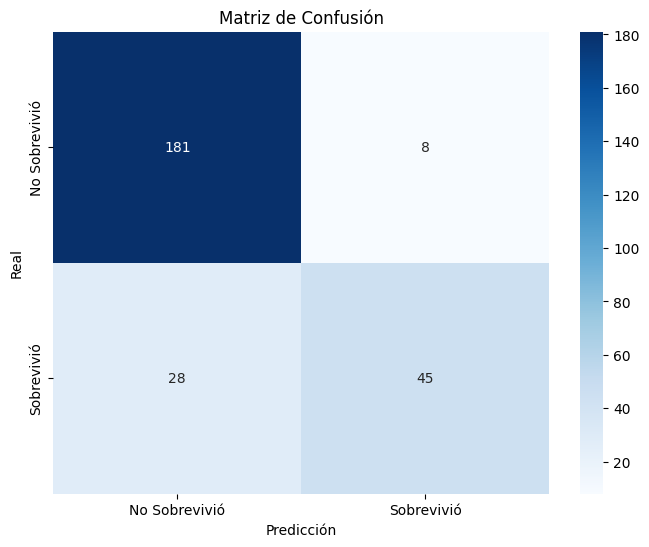

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generar predicciones
y_pred = model.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Sobrevivió', 'Sobrevivió'], yticklabels=['No Sobrevivió', 'Sobrevivió'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


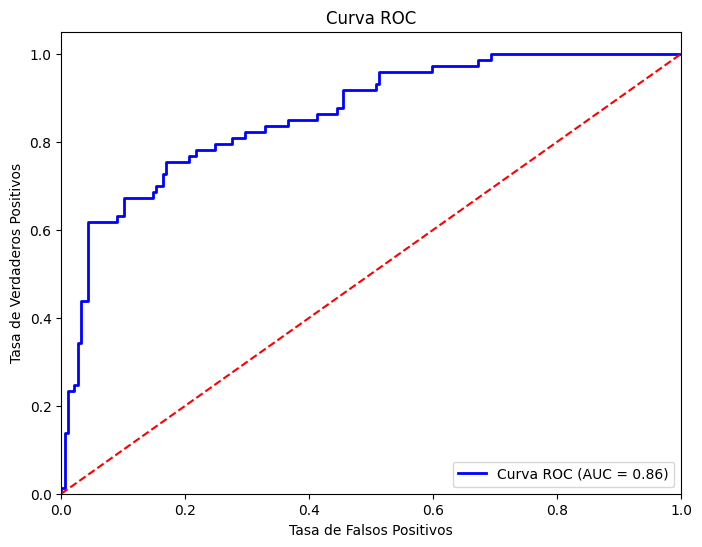

In [38]:
from sklearn.metrics import roc_curve, auc

# Predecir probabilidades
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


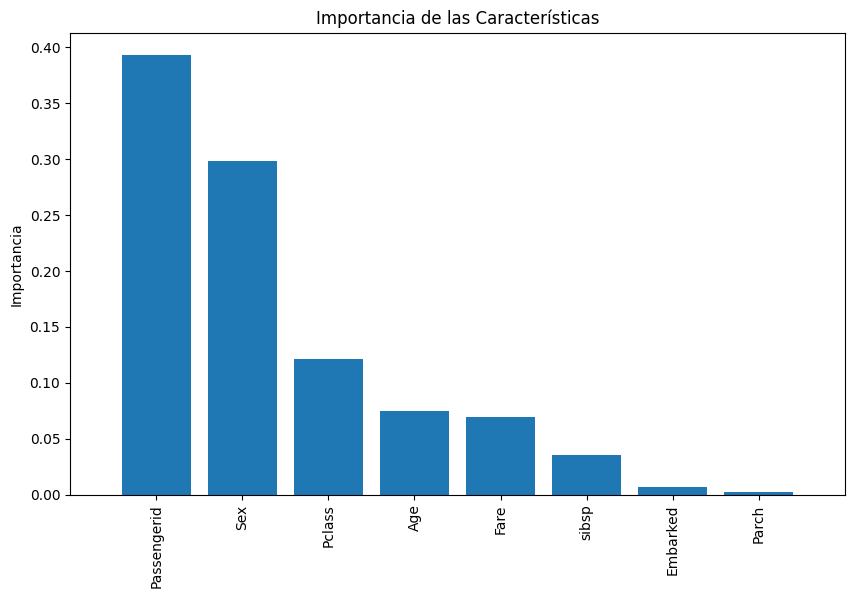

In [41]:
from sklearn.ensemble import GradientBoostingClassifier  # Si es el caso
# O si has usado XGBoost
from xgboost import XGBClassifier

# Suponiendo que tienes un modelo de Gradient Boosting entrenado, como `gb_model`
importances = gb_model.feature_importances_  # Usa el modelo correcto aquí
indices = np.argsort(importances)[::-1]  # Ordenar por importancia

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.title('Importancia de las Características')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(X.columns)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.ylabel('Importancia')
plt.show()


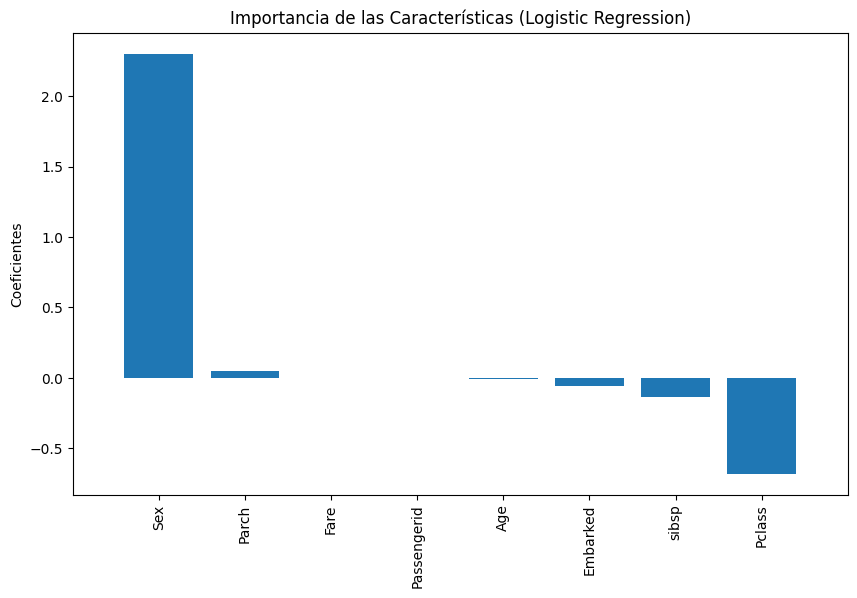

In [42]:
# Suponiendo que tu modelo es Logistic Regression
coefficients = model.coef_[0]
indices = np.argsort(coefficients)[::-1]  # Ordenar por coeficientes

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.title('Importancia de las Características (Logistic Regression)')
plt.bar(range(X.shape[1]), coefficients[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(X.columns)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.ylabel('Coeficientes')
plt.show()


In [43]:
# Obtener las probabilidades de supervivencia para el conjunto de prueba
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidad de la clase 1 (sobrevivir)


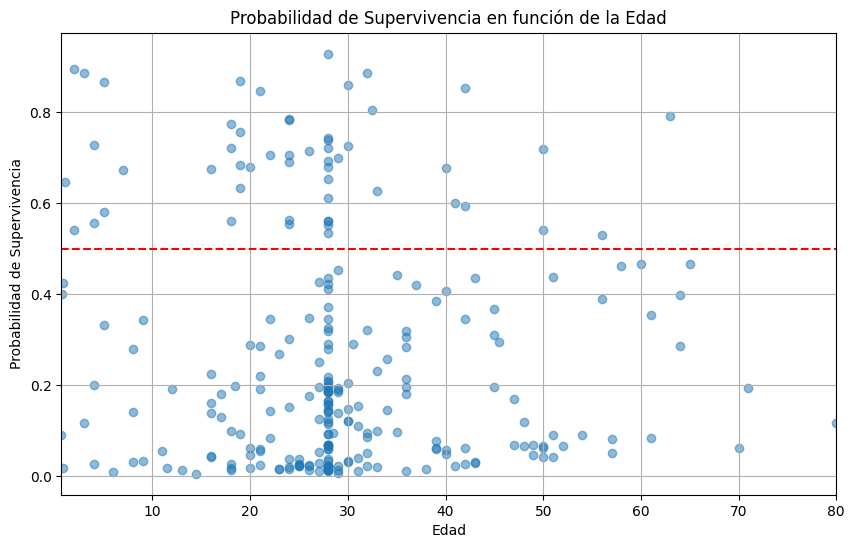

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# Suponiendo que tienes un DataFrame 'df' con tus datos de prueba y la columna 'Age'
# Asegúrate de que df_test tenga las mismas columnas que usaste para entrenar el modelo
df_test = X_test.copy()
df_test['Survival Probability'] = y_prob  # Agregar las probabilidades al DataFrame

# Graficar las probabilidades de supervivencia
plt.figure(figsize=(10, 6))
plt.scatter(df_test['Age'], df_test['Survival Probability'], alpha=0.5)
plt.title('Probabilidad de Supervivencia en función de la Edad')
plt.xlabel('Edad')
plt.ylabel('Probabilidad de Supervivencia')
plt.axhline(0.5, color='red', linestyle='--')  # Línea de referencia en 0.5
plt.xlim(df_test['Age'].min(), df_test['Age'].max())
plt.grid()
plt.show()


In [46]:
results_df = X_test.copy()
results_df['Survival Probability'] = y_prob
results_df['Prediction'] = model.predict(X_test)

print(results_df.head())
results_df.to_csv('titanic_survival_predictions.csv', index=False)


      Passengerid   Age    Fare  Sex  sibsp  Parch  Pclass  Embarked  \
1148         1149  28.0   8.050    0      0      0       3       2.0   
1049         1050  42.0  26.550    0      0      0       1       2.0   
982           983  28.0   7.775    0      0      0       3       2.0   
808           809  39.0  13.000    0      0      0       2       2.0   
1195         1196  28.0   7.750    1      0      0       3       1.0   

      Survival Probability  Prediction  
1148              0.014340           0  
1049              0.061223           0  
982               0.022029           0  
808               0.059326           0  
1195              0.119643           0  
